# APRESENTAÇÃO

Motivado pelo web scrape de Gregory Smith sobre VGChartz Video Games Sales, este conjunto de dados simplesmente estende o número de variáveis ​​com outro web scrape do Metacritic. Infelizmente, há observações ausentes, pois o Metacritic cobre apenas um subconjunto das plataformas.
Responder as seguintes questões:

1 - MOSTRAR GRAFICAMENTE O VOLUME DE VENDAS GLOBAL AO LONGO DOS ANOS;

2 - VERIFICAR A DENSIDADE DA DISTRIBUIÇÃO DOS VALORES GLOBAIS;
3 - FAZER A DISTRIBUIÇÃO NO BOXPLOT;

4 - MOSTRAR UMA TABELA ANALITICA COM OS JOGOS QUE JÁ VENDERAM MAIS QUE 10 MILHÕES DE VALOR GLOBAL;

5 - FAZER UMA ANALISE PERCENTUAL DE VENDA GLOBAL POR ANO POR CONTINENTE;

6 - LISTAR AS TOP 10 DESENVOLVEDORAS DE JOGOS PARA O PS4 EM VALORES GLOBAIS ACUMULADOS;

7 - LISTAR OS TOP 10 JOGOS MAIS VENDIDOS EM VALORES GLOBAIS ACUMULADOS.



# CÓDIGO

## 1. CONEXÕES, IMPORTAÇÕES E CARREGAMENTOS

2.1 - CONEXÕES

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.2 - IMPORTAÇÕES

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
print('Conectado')

Conectado


2.3 - CARREGAMENTOS

In [97]:
df=pd.read_csv('/content/drive/MyDrive/2_REPOSITORIOS/PYTHON/PTH_006_GAMES/PS4_GamesSales.csv',encoding="latin-1")
df.shape

(1034, 9)

## 2. ETL

In [98]:
# Verificando se é necessário mudar o tipo das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [99]:
#VERIFICANDO O CONTEUDO DO BD
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [100]:
#NULOS
df.isnull().sum()

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


In [101]:
#remover valores nulos
df.dropna(inplace=True)

In [102]:
#estatisticas
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


## 3. ANÁLISES

In [104]:
#1 - REMOVENDO OS ANOS 2019 E 2020
df=df.loc[(df['Year']!=2019) & (df['Year']!=2020)]

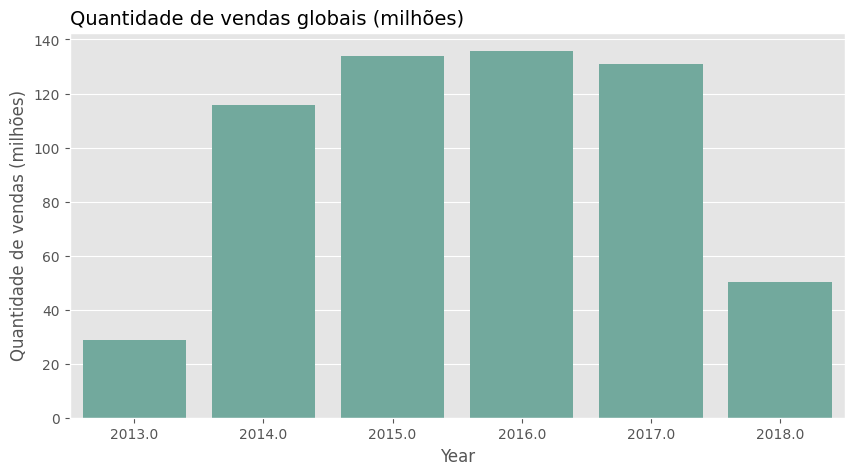

In [105]:
#1 - VOLUME DE VENDAS GLOBAL AO LONGO DOS ANOS (SEM 2019 E 2020)
plt.figure(figsize=(10,5))
plt.title('Quantidade de vendas globais (milhões)',loc='left',fontsize=14)
plt.ylabel('Quantidade de vendas (milhões)')
sns.barplot(data=df,x='Year',y='Global',ci = None, color='#69b2a2',estimator=sum);


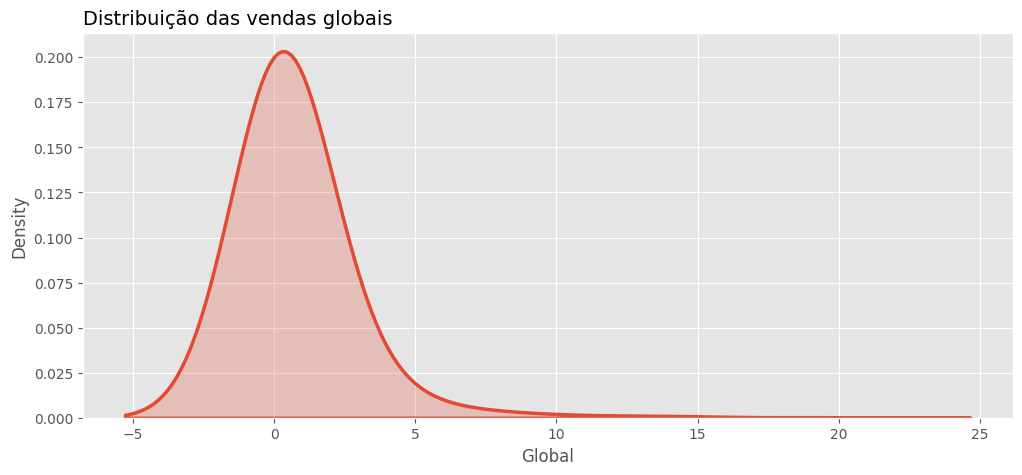

In [106]:
#2 - VERIFICAR A DISTRITUIÇÃO DOS VALORES GLOBAIS
plt.figure(figsize=(12,5))
plt.style.use('ggplot')

plt.title('Distribuição das vendas globais', loc='left',fontsize=14)
sns.kdeplot(df['Global'],shade=True, bw=1, linewidth=2.5); #grafico de densidade

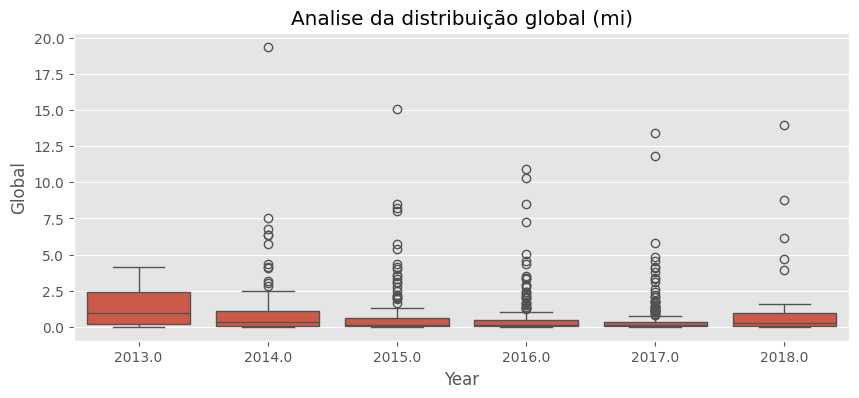

In [108]:
#3 - DISTRIBUIÇÃO DO BOXPLOT
plt.figure(figsize=(10,4))

plt.title('Analise da distribuição global (mi)')
sns.boxplot(data=df,x="Year",y='Global');

In [109]:
#4 - JOGOS QUE VENDERAM MAIS QUE 10 MILHÕES
df.loc[df['Global']>=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [110]:
#5 - ANALISE PERCENTUAL DE VENDAS POR CONTINENTE
df_filtrado = df[["Year", "North America", "Europe", "Japan", "Rest of World", "Global"]]
df_filtrado

,Year,North America,Europe,Japan,Rest of World,Global
0,2014.0,6.06,9.71,0.60,3.02,19.39
1,2015.0,6.18,6.05,0.41,2.44,15.09
2,2018.0,5.26,6.21,0.21,2.26,13.94
3,2017.0,4.67,6.21,0.40,2.12,13.40
4,2017.0,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...
1024,2018.0,0.00,0.00,0.00,0.00,0.00
1026,2017.0,0.00,0.00,0.00,0.00,0.00
1027,2017.0,0.00,0.00,0.00,0.00,0.00
1028,2018.0,0.00,0.00,0.00,0.00,0.00


In [111]:
#5 - ANALISE PERCENTUAL DE VENDAS POR CONTINENTE
analise=df_filtrado.groupby(by=['Year']).sum()
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


In [112]:
#5 - ANALISE PERCENTUAL DE VENDAS POR CONTINENTE
America = [America / Total * 100 for America, Total in zip(analise['North America'],analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(analise['Europe'],analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(analise['Japan'],analise['Global'])]
Resto = [Resto / Total * 100 for Resto, Total in zip(analise['Rest of World'],analise['Global'])]

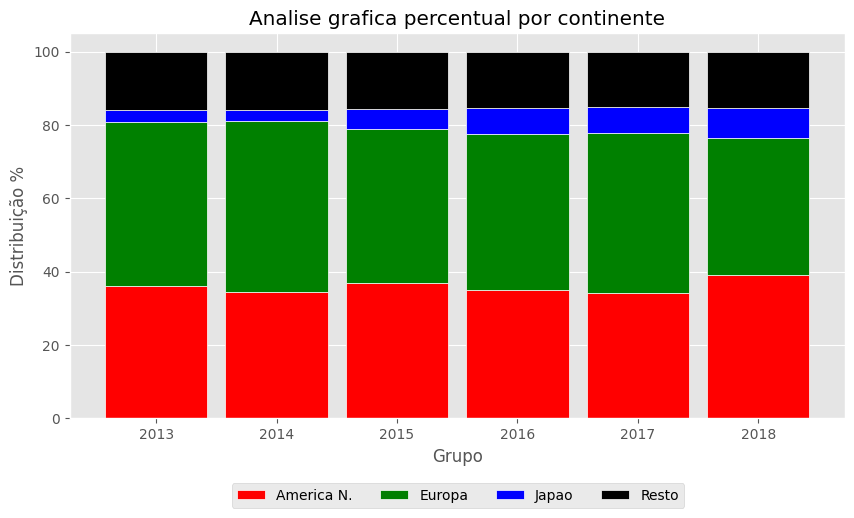

In [179]:
#5 - ANALISE PERCENTUAL DE VENDAS POR CONTINENTE (analise grafica)
plt.figure(figsize=(10,5))
largura_barra = 0.85
grupos=[0,1,2,3,4,5]
ano=['2013','2014','2015','2016','2017','2018']

plt.bar(grupos,America,width=largura_barra,color='red',edgecolor='white')
plt.bar(grupos,Europa,bottom=America,width=largura_barra,color='green',edgecolor='white')
plt.bar(grupos,Japao,bottom=[A+B for A, B in zip(America,Europa)],width=largura_barra,color='blue',edgecolor='white')
plt.bar(grupos,Resto,bottom=[A+B+C for A, B, C in zip(America,Europa,Japao)],width=largura_barra,color='black',edgecolor='white')

plt.title('Analise grafica percentual por continente')
plt.xticks(grupos,ano)
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

plt.legend( ['America N.','Europa','Japao','Resto'],loc='upper left',bbox_to_anchor=(0.2,-0.15),ncol=4);

In [191]:
6# - LISTAR AS TOP 10 DESENVOLVEDORAS DE JOGOS PARA O PS4 PELO RESULTADO GLOBAL ACUMULADO
analise_fab=df.groupby(by=['Publisher']).sum('Global').sort_values('Global',ascending=False)
analise_fab.head(10)

,Year,North America,Europe,Japan,Rest of World,Global
Publisher,,,,,,
Activision,60453.0,28.20,30.96,1.65,11.71,72.44
Ubisoft,88679.0,18.50,29.46,1.91,9.22,59.16
Electronic Arts,40308.0,17.05,27.88,1.42,8.60,54.96
Sony Interactive Entertainment,88738.0,21.07,22.96,2.14,8.73,54.85
EA Sports,38290.0,15.18,24.36,0.40,7.60,47.55
Sony Computer Entertainment,48351.0,15.95,17.96,1.64,6.72,42.26
Rockstar Games,6049.0,11.50,16.24,0.81,5.38,33.93
Square Enix,74587.0,9.60,10.36,5.95,3.97,29.92
Bethesda Softworks,34272.0,9.82,13.83,0.71,4.56,28.96


In [190]:
#7 - TOP 10 JOGOS MAIS VENDIDOS
analise_jogos=df.groupby(by=['Game']).sum('Global').sort_values('Global',ascending=False)
analise_jogos.head(10)

,Year,North America,Europe,Japan,Rest of World,Global
Game,,,,,,
Grand Theft Auto V,2014.0,6.06,9.71,0.60,3.02,19.39
Call of Duty: Black Ops 3,2015.0,6.18,6.05,0.41,2.44,15.09
Red Dead Redemption 2,2018.0,5.26,6.21,0.21,2.26,13.94
Call of Duty: WWII,2017.0,4.67,6.21,0.40,2.12,13.40
FIFA 18,2017.0,1.27,8.64,0.15,1.73,11.80
FIFA 17,2016.0,1.26,7.95,0.12,1.61,10.94
Uncharted (PS4),2016.0,4.49,3.93,0.21,1.70,10.33
Spider-Man (PS4),2018.0,3.64,3.39,0.32,1.41,8.76
Call of Duty: Infinite Warfare,2016.0,3.11,3.83,0.19,1.36,8.48
